In [12]:
from __future__ import print_function
import librosa
import librosa.display
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y, sr = librosa.load("../SalamonNotebook/mir_class_train/MusicDelta_Beatles_MIX.wav", sr=None)

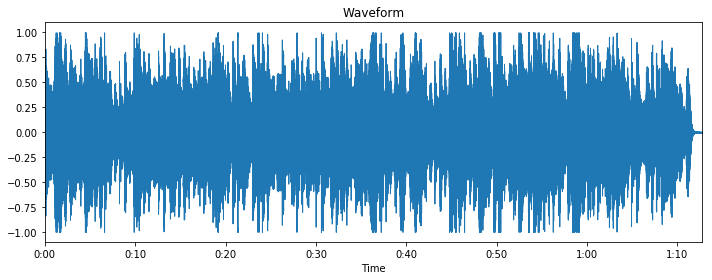

In [21]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(y)
plt.title('Waveform')
plt.tight_layout()

In [15]:
stft = librosa.stft(y)

/home/compmus/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


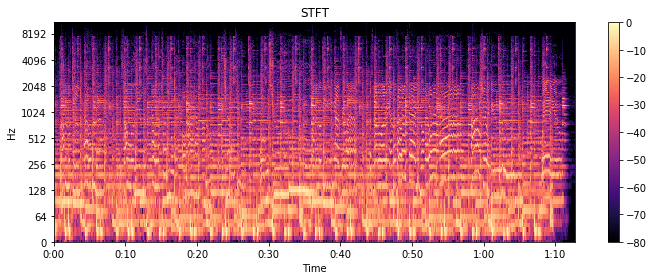

In [19]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),\
                         y_axis='log', x_axis='time')
plt.colorbar()
plt.title('STFT')
plt.tight_layout()

In [5]:
mfcc = librosa.feature.mfcc(y, sr=sr)

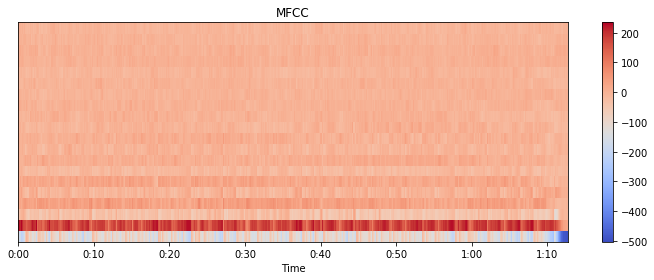

In [13]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()


## HPSS

In [22]:
H, P = librosa.decompose.hpss(stft)

/home/compmus/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


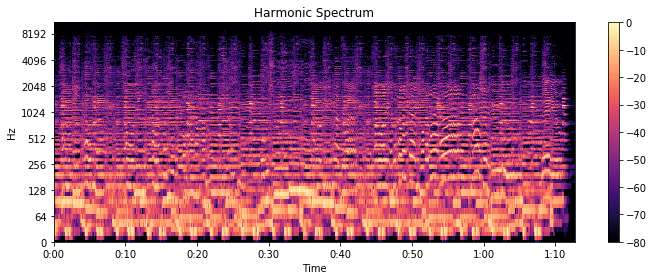

In [23]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(H, ref=np.max),\
                         y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Harmonic Spectrum')
plt.tight_layout()

/home/compmus/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


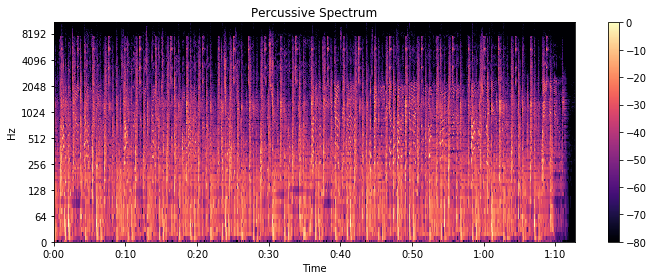

In [24]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(P, ref=np.max),\
                         y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive Spectrum')
plt.tight_layout()

In [1]:
import os
import json
import pandas as pd
import librosa
#import csv # if use the csv to save features files

from src.features.calculate import *

In [18]:
MDB = (os.environ.get("MEDLEYDB_PATH", '../MedleyDB'))
print (MDB)

../MedleyDB


In [11]:
with open('split_voiced_medleydb.json') as f:
    data = json.load(f)

In [12]:
#print (data)

{'test': ['CelestialShore_DieForUs', 'InvisibleFamiliars_DisturbingWildlife', 'MusicDelta_Country1', 'MusicDelta_Country2', 'MusicDelta_Gospel', 'MusicDelta_Rock', 'PortStWillow_StayEven', 'Snowmine_Curfews', 'StrandOfOaks_Spacestation', 'SweetLights_YouLetMeDown'], 'validation': ['AimeeNorwich_Child', 'Handel_TornamiAVagheggiar', 'LizNelson_Coldwar', 'LizNelson_Rainfall', 'Meaxic_TakeAStep', 'Meaxic_YouListen', 'Mozart_BesterJungling', 'MusicDelta_Britpop', 'NightPanther_Fire', 'Schumann_Mignon', 'SecretMountains_HighHorse', 'TheSoSoGlos_Emergency', 'Wolf_DieBekherte'], 'train': ['AClassicEducation_NightOwl', 'AlexanderRoss_GoodbyeBolero', 'AlexanderRoss_VelvetCurtain', 'Auctioneer_OurFutureFaces', 'AvaLuna_Waterduct', 'BigTroubles_Phantom', 'BrandonWebster_DontHearAThing', 'BrandonWebster_YesSirICanFly', 'ClaraBerryAndWooldog_AirTraffic', 'ClaraBerryAndWooldog_Boys', 'ClaraBerryAndWooldog_Stella', 'ClaraBerryAndWooldog_TheBadGuys', 'ClaraBerryAndWooldog_WaltzForMyVictims', 'Creepoid_

In [44]:
newpath = MDB+'/features' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

for mtrack in (data['test']+data['validation']+data['train']):
    print (mtrack)
    newdir = MDB+'/features/'+mtrack 
    if not os.path.exists(newdir):
        os.makedirs(newdir)
        
    # load audio file
    y, sr = librosa.load(MDB+'/Audio/'+mtrack+'/'+mtrack+'_MIX.wav', sr = None)
    
    # calculate all features for each multitrack
    mfcc = calculate_mfcc(y, sr)
    
    print (mfcc)
    
    df = pd.DataFrame(mfcc)
    df.to_csv(newdir+'/'+mtrack+'_mfcc.csv', header=None, index=None)
    print ('Saved MFCC features')
    
    D = librosa.stft(y, sr)
    H, P = calculate_hpss(D)
    
    print (H, P)
    
    df = pd.DataFrame(H)
    df.to_csv(newdir+'/'+mtrack+'_H.csv', header=None, index=None)
    print ('Saved Harmonic Spectrogram features')
    
    break

CelestialShore_DieForUs
[[  1.19461321e-03   4.79632981e-04   1.91709212e-04 ...,   3.74590744e-09
    5.58153414e-09   8.42782565e-09]
 [  2.05042032e-03   1.92193499e-03   1.55262731e-03 ...,   2.08318613e-09
    2.27723321e-09   5.81079852e-09]
 [  5.87267694e-04   1.81309346e-03   2.23172551e-03 ...,   2.96398381e-09
    5.98655414e-09   3.25704754e-09]
 ..., 
 [  7.34405796e-06   5.31453304e-06   5.11175095e-06 ...,   5.30152896e-09
    6.16113086e-09   5.44122870e-09]
 [  5.09512639e-06   7.07749876e-06   1.13821260e-05 ...,   5.21054749e-09
    6.01530912e-09   4.18548538e-09]
 [  4.66440654e-06   5.91052818e-06   1.02773746e-05 ...,   2.38538491e-09
    5.44124735e-09   5.16246823e-09]]
Saved MFCC features
[[ -2.02806905e-01 +1.77299420e-08j   1.59372874e-02 +0.00000000e+00j
   -2.08031476e-01 +1.81866895e-08j ...,  -6.58053393e-03 +5.75288539e-10j
   -3.55994925e-02 +3.11220649e-09j  -7.85074104e-03 +6.86333601e-10j]
 [  4.15237397e-01 -2.91869792e-16j  -2.70852596e-01 -3.1121

In [42]:
# Seems to be faster then df.to_csv...
#with open(newdir+'/'+mtrack+'_mfcc.csv', 'w') as csvfile:
#    spamwriter = csv.writer(csvfile, delimiter=',',
#                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
#    spamwriter.writerows(mfcc)

In [39]:
# Load VGGish audio embeddings
rmfcc = pd.read_csv(newdir+'/'+mtrack+'_mfcc.csv',index_col=None, header=None)
rmfcc = pd.DataFrame.as_matrix(rmfcc)
print (rmfcc)

[[  1.19461321e-03   4.79632981e-04   1.91709212e-04 ...,   3.74590744e-09
    5.58153414e-09   8.42782565e-09]
 [  2.05042032e-03   1.92193499e-03   1.55262731e-03 ...,   2.08318613e-09
    2.27723321e-09   5.81079852e-09]
 [  5.87267694e-04   1.81309346e-03   2.23172551e-03 ...,   2.96398381e-09
    5.98655414e-09   3.25704754e-09]
 ..., 
 [  7.34405796e-06   5.31453304e-06   5.11175095e-06 ...,   5.30152896e-09
    6.16113086e-09   5.44122870e-09]
 [  5.09512639e-06   7.07749876e-06   1.13821260e-05 ...,   5.21054749e-09
    6.01530912e-09   4.18548538e-09]
 [  4.66440654e-06   5.91052818e-06   1.02773746e-05 ...,   2.38538491e-09
    5.44124735e-09   5.16246823e-09]]
